0.005773502691896258
0.009837996752172368
VaR 0.01: -18472.362046227874
ES 0.01: -25327.20775114756


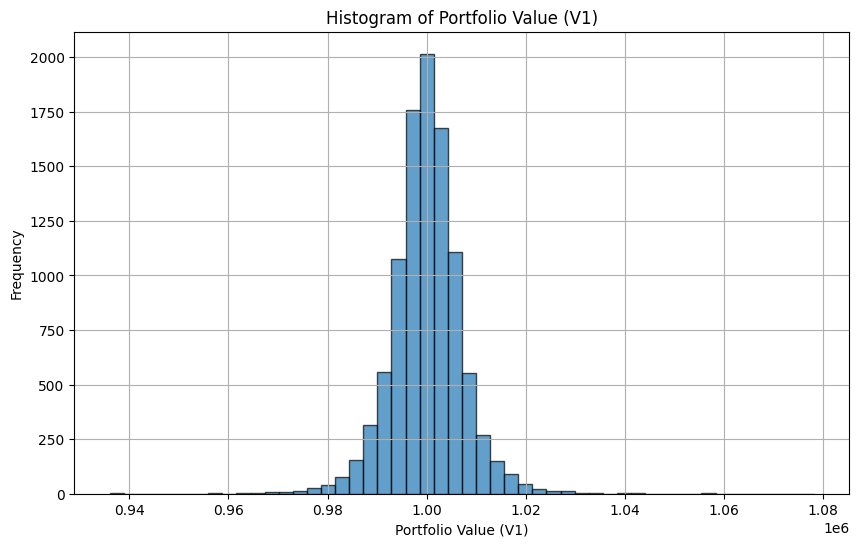

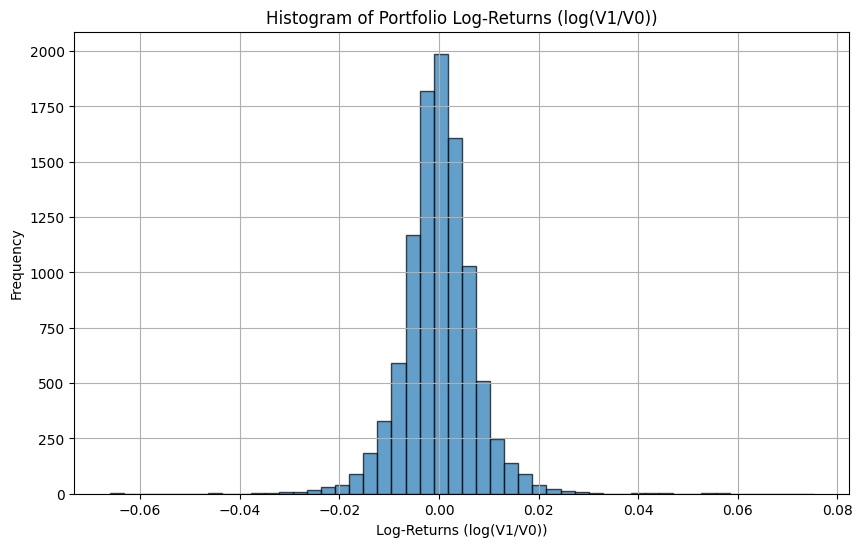

In [5]:
# Gaussian coupla 
import numpy as np
from scipy.stats import norm, t

# Parameters
n_assets = 50
n_simulations = 10000
tau = 0.4
rho = np.sin(np.pi * tau / 2)  # Convert Kendall's tau to correlation
std_dev = 0.01
dof = 3  # Degrees of freedom for t-distribution
raw_std = np.sqrt(dof / (dof - 2))

# Determine scale parameter
scale_param = std_dev / raw_std

print(scale_param)

np.random.seed(10)

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)

# Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)

# Step 1: Generate standard normal samples
Z = np.random.randn(n_simulations, n_assets)

# Step 2: Introduce dependency using the Cholesky factor
dependent_normals = Z @ L.T

# Step 3: Convert normals to uniform
uniforms = norm.cdf(dependent_normals)

# Step 4: Convert uniforms to t-distribution
log_returns = t.ppf(uniforms, dof) * scale_param

print(np.std(log_returns))

# Portfolio value simulation
V0 = 20000 * n_assets
P1 = 20000 * np.exp(log_returns)
V1 = np.sum(P1, axis = 1)

# Log-returns 
log_returns = np.log(V1 / V0)


# Ensure V1 and V0 are NumPy arrays
#V1 = np.array(V1)  # Portfolio values tomorrow
#V0 = np.array(V0)  # Portfolio value today (should be scalar or array with same shape as V1)

# Compute portfolio returns
portfolio_returns = V1 - V0  # This should now be an array

# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

import matplotlib.pyplot as plt

# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





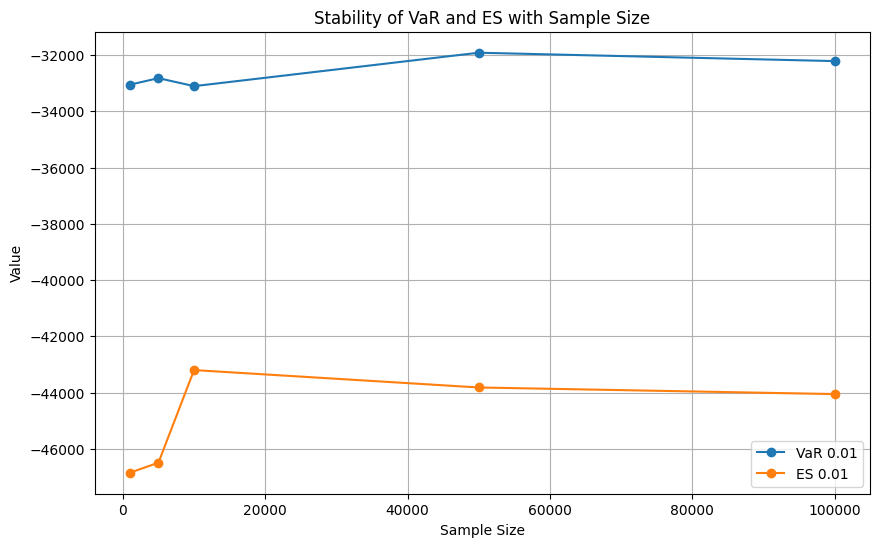

In [ ]:
#Different sample sizes 
sample_sizes = [1000, 5000, 10000, 50000, 100000]
var_values = []
es_values = []

for n in sample_sizes:
    Z = np.random.randn(n, n_assets)
    dependent_normals = Z @ L.T
    uniforms = norm.cdf(dependent_normals)
    log_returns = t.ppf(uniforms, dof) * scale_param

    P1 = 20000 * np.exp(log_returns)
    V1 = np.sum(P1, axis=1)
    portfolio_returns = V1 - V0

    var_01 = np.percentile(portfolio_returns, 1)
    var_values.append(var_01) 

    losses_below_var = portfolio_returns[portfolio_returns <= var_01]
    #es_01 = np.mean(losses_below_var)
    #es_values.append(es_01)

# Plot stability of VaR and ES
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, var_values, marker='o', label='VaR 0.01')
plt.plot(sample_sizes, es_values, marker='o', label='ES 0.01')
plt.title('Stability of VaR and ES with Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


VaR 0.01: -18483.41146160646
ES 0.01: -25808.005428939527


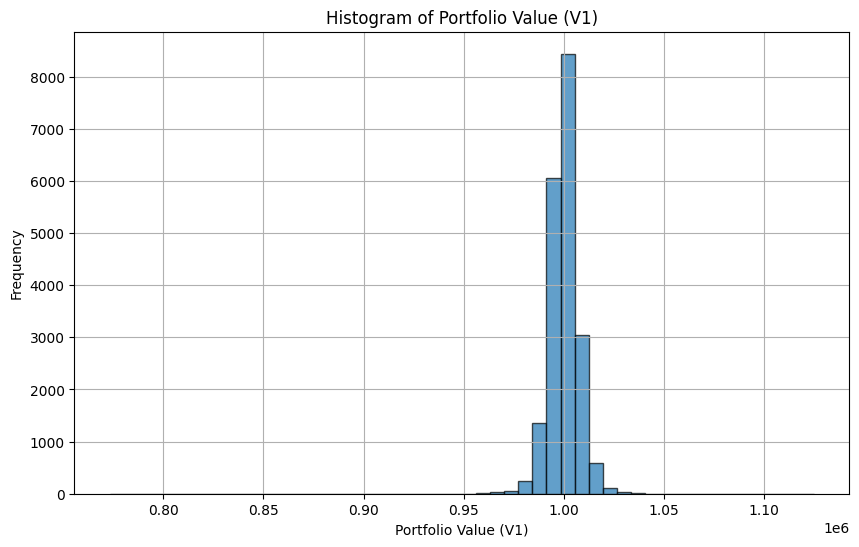

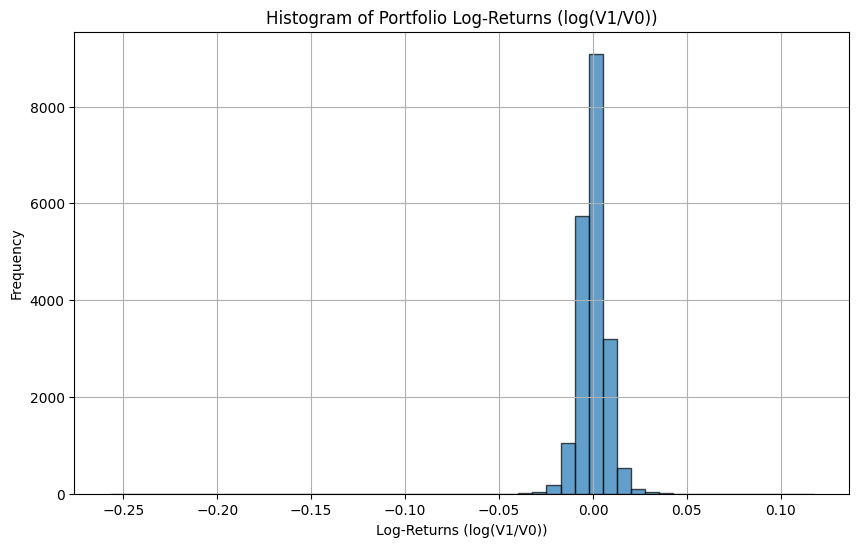

In [3]:
import numpy as np
from scipy.stats import t
# T - copula 
# Parameters
n_assets = 50
n_simulations = 20000
tau = 0.4
dof_copula = 4  # Degrees of freedom for t-copula
std_dev = 0.01
dof_marginals = 3  # Degrees of freedom for the marginals (Student's t-distribution)

# Convert Kendall's tau to correlation
rho = np.sin(np.pi * tau / 2)

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)

# Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)

# Step 1: Generate independent t-distributed samples for the copula
independent_t = np.random.standard_t(dof_copula, size=(n_simulations, n_assets))

# Step 2: Introduce dependency using the Cholesky factor
dependent_t = independent_t @ L.T

# Step 3: Convert t-copula marginals to uniform
uniforms = t.cdf(dependent_t, dof_copula)

# Step 4: Convert uniforms to t-distribution for log-returns
log_returns = t.ppf(uniforms, dof_marginals) * scale_param

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value
P1 = 20000 * np.exp(log_returns)  # Simulated future prices
V1 = np.sum(P1, axis=1)  # Simulated portfolio values

# Compute portfolio returns
portfolio_returns = V1 - V0  # Portfolio returns
log_returns = np.log(V1 / V0)


# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


VaR 0.01: -25412.81661773312
ES 0.01: -37427.12269236854


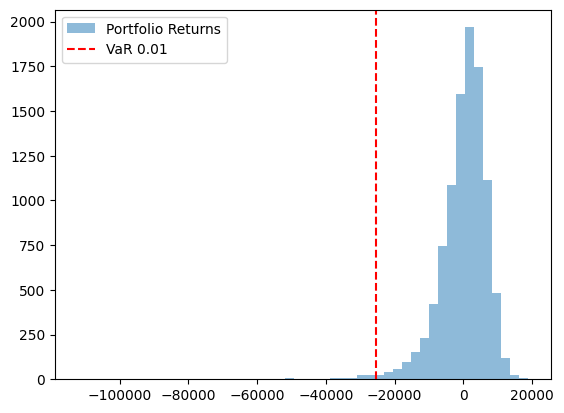

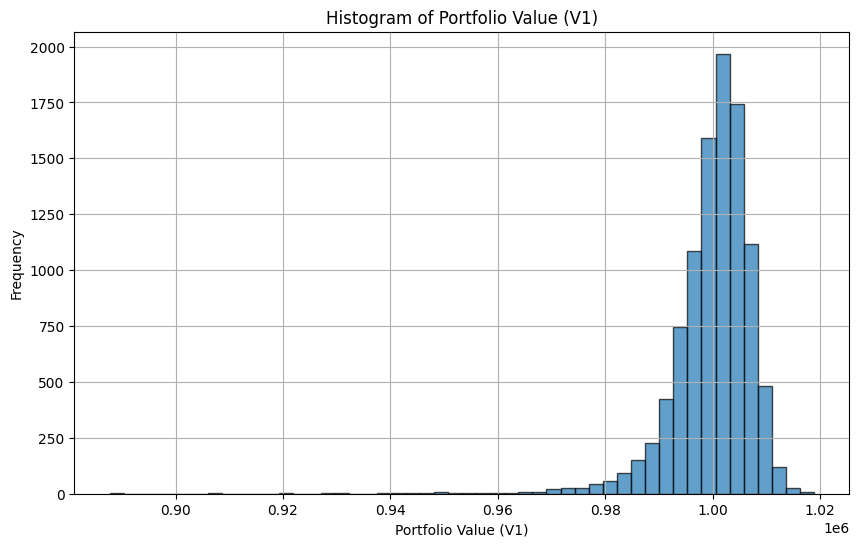

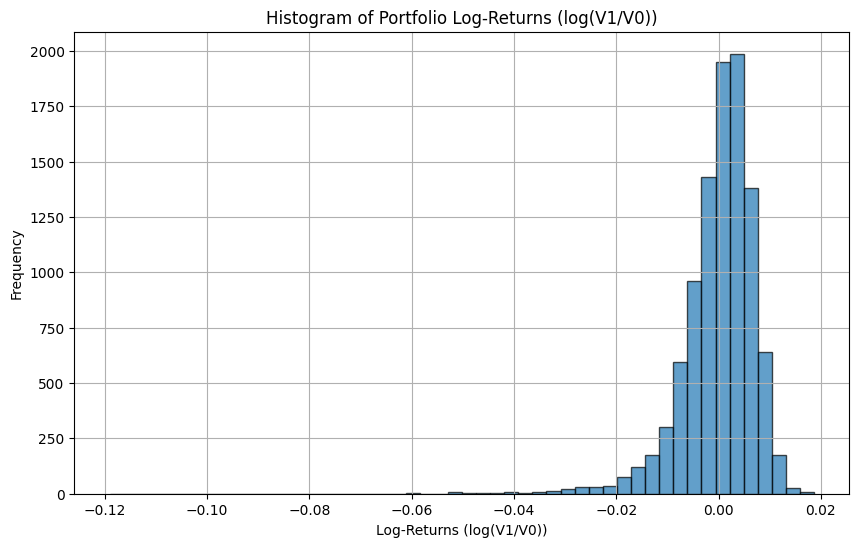

In [4]:
# Clayton coupla 

import numpy as np
from scipy.stats import t
from scipy.stats import gaussian_kde


# Parameters
n_assets = 50
n_simulations = 10000
tau = 0.4
std_dev = 0.01
dof_marginals = 3  # Degrees of freedom for the Student's t-marginals

# Convert Kendall's tau to Clayton copula parameter (theta)
theta = 2 * tau / (1 - tau)

# Step 1: Generate independent uniform samples
U = np.random.uniform(size=(n_simulations, n_assets))

# Step 2: Introduce dependency using the Clayton copula
# Simulate dependent uniforms using the Clayton copula structure
Xc = np.random.gamma(1 / theta, 1, size=(n_simulations,))  # Gamma random variables
dependent_uniforms = (-np.log(U) / Xc[:, None] + 1) ** (-1 / theta)  # Clayton copula formula
# Step 3: Convert dependent uniforms to Student's t-distribution
log_returns = t.ppf(dependent_uniforms, dof_marginals) * scale_param

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value
P1 = 20000 * np.exp(log_returns)  # Simulated future prices
V1 = np.sum(P1, axis=1)  # Simulated portfolio values 

# Compute portfolio returns
portfolio_returns = V1 - V0  # Portfolio returns

log_returns = np.log(V1 / V0)
# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

import matplotlib.pyplot as plt

plt.hist(portfolio_returns, bins=50, alpha=0.5, label="Portfolio Returns")
plt.axvline(var_01, color="red", linestyle="--", label="VaR 0.01")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




Gaussian Copula: VaR 0.01 = -19316.318016350146, ES 0.01 = -25930.884988830123
T4 Copula: VaR 0.01 = -17779.290962066792, ES 0.01 = -23771.54906013656
Clayton Copula: VaR 0.01 = -23927.429988485354, ES 0.01 = -37135.911346908535


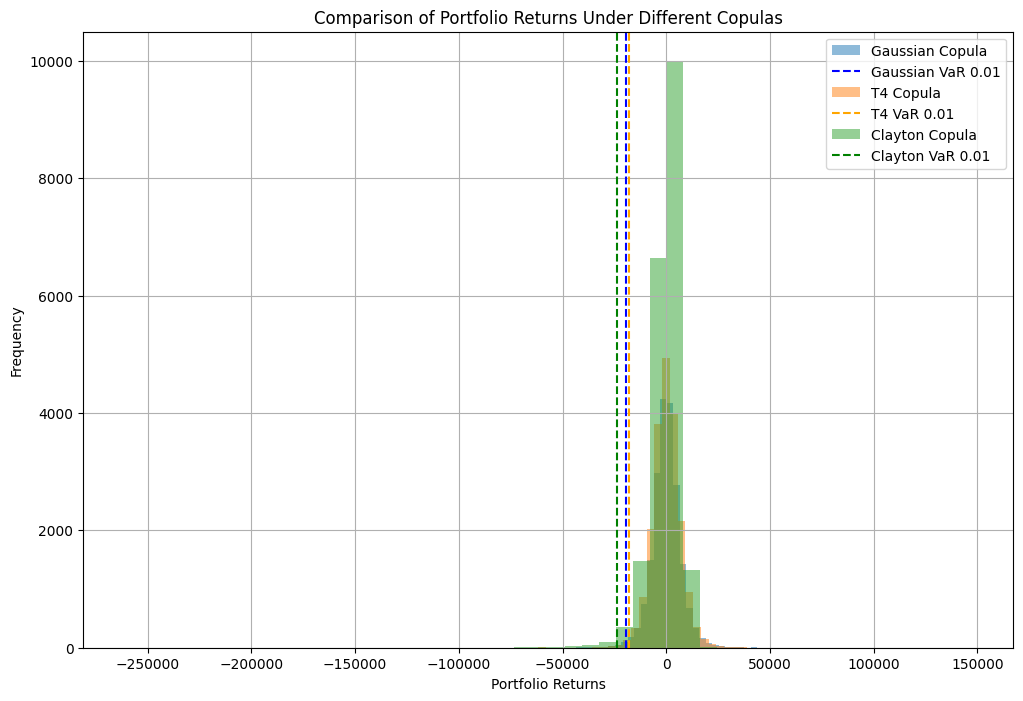

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Parameters
n_assets = 50
n_simulations = 20000
tau = 0.4
dof_copula = 4  # Degrees of freedom for t-copula
std_dev = scale_param
dof_marginals = 3  # Degrees of freedom for the marginals (Student's t-distribution)

# Convert Kendall's tau to correlation and Clayton parameter
rho = np.sin(np.pi * tau / 2)
theta = 2 * tau / (1 - tau)

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)

# Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value

# Function to compute VaR and ES
def compute_var_es(portfolio_returns, percentile=1):
    var = np.percentile(portfolio_returns, percentile)
    es = np.mean(portfolio_returns[portfolio_returns <= var])
    return var, es

# Gaussian Copula
Z_gaussian = np.random.randn(n_simulations, n_assets)
dependent_normals = Z_gaussian @ L.T
uniforms_gaussian = norm.cdf(dependent_normals)
log_returns_gaussian = t.ppf(uniforms_gaussian, dof_marginals) * std_dev
P1_gaussian = 20000 * np.exp(log_returns_gaussian)
V1_gaussian = np.sum(P1_gaussian, axis=1)
portfolio_returns_gaussian = V1_gaussian - V0
var_gaussian, es_gaussian = compute_var_es(portfolio_returns_gaussian)

# T4 Copula
independent_t = np.random.standard_t(dof_copula, size=(n_simulations, n_assets))
dependent_t = independent_t @ L.T
uniforms_t = t.cdf(dependent_t, dof_copula)
log_returns_t = t.ppf(uniforms_t, dof_marginals) * std_dev
P1_t = 20000 * np.exp(log_returns_t)
V1_t = np.sum(P1_t, axis=1)
portfolio_returns_t = V1_t - V0
var_t, es_t = compute_var_es(portfolio_returns_t)

# Clayton Copula
U_clayton = np.random.uniform(size=(n_simulations, n_assets))
Xc = np.random.gamma(1 / theta, 1, size=(n_simulations,))
dependent_uniforms_clayton = (-np.log(U_clayton) / Xc[:, None] + 1) ** (-1 / theta)
log_returns_clayton = t.ppf(dependent_uniforms_clayton, dof_marginals) * std_dev
P1_clayton = 20000 * np.exp(log_returns_clayton)
V1_clayton = np.sum(P1_clayton, axis=1)
portfolio_returns_clayton = V1_clayton - V0
var_clayton, es_clayton = compute_var_es(portfolio_returns_clayton)

# Print Results
print(f"Gaussian Copula: VaR 0.01 = {var_gaussian}, ES 0.01 = {es_gaussian}")
print(f"T4 Copula: VaR 0.01 = {var_t}, ES 0.01 = {es_t}")
print(f"Clayton Copula: VaR 0.01 = {var_clayton}, ES 0.01 = {es_clayton}")

# Plotting
plt.figure(figsize=(12, 8))
plt.hist(portfolio_returns_gaussian, bins=50, alpha=0.5, label="Gaussian Copula")
plt.axvline(var_gaussian, color="blue", linestyle="--", label="Gaussian VaR 0.01")
plt.hist(portfolio_returns_t, bins=50, alpha=0.5, label="T4 Copula")
plt.axvline(var_t, color="orange", linestyle="--", label="T4 VaR 0.01")
plt.hist(portfolio_returns_clayton, bins=50, alpha=0.5, label="Clayton Copula")
plt.axvline(var_clayton, color="green", linestyle="--", label="Clayton VaR 0.01")
plt.title("Comparison of Portfolio Returns Under Different Copulas")
plt.xlabel("Portfolio Returns")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


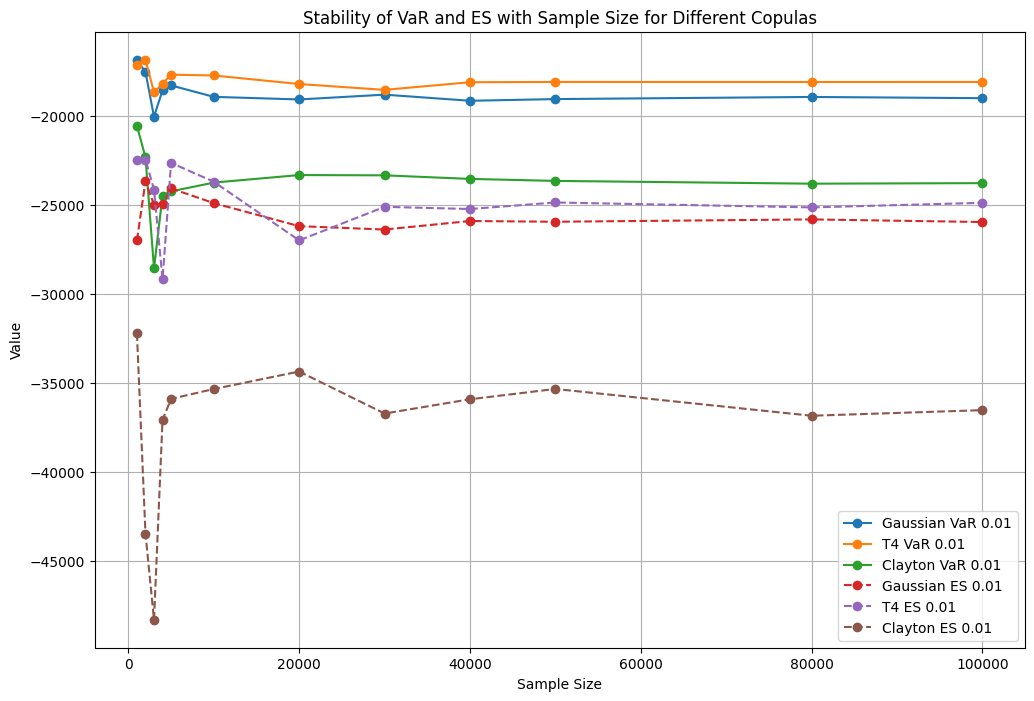

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Parameters
n_assets = 50
sample_sizes = [1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 80000, 100000]
tau = 0.4
dof_copula = 4  # Degrees of freedom for t-copula
std_dev = scale_param
dof_marginals = 3  # Degrees of freedom for the marginals (Student's t-distribution)
theta = 2 * tau / (1 - tau)  # Clayton copula parameter
rho = np.sin(np.pi * tau / 2)  # Gaussian and t-copula correlation

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)
L = np.linalg.cholesky(correlation_matrix)

# Function to compute VaR and ES
def compute_var_es(portfolio_returns, percentile=1):
    var = np.percentile(portfolio_returns, percentile)
    es = np.mean(portfolio_returns[portfolio_returns <= var])
    return var, es

# Lists to store results
results = {"Gaussian": {"VaR": [], "ES": []},
           "T4": {"VaR": [], "ES": []},
           "Clayton": {"VaR": [], "ES": []}}

# Simulate for each sample size
for n_simulations in sample_sizes:
    # Gaussian Copula
    Z_gaussian = np.random.randn(n_simulations, n_assets)
    dependent_normals = Z_gaussian @ L.T
    uniforms_gaussian = norm.cdf(dependent_normals)
    log_returns_gaussian = t.ppf(uniforms_gaussian, dof_marginals) * std_dev
    P1_gaussian = 20000 * np.exp(log_returns_gaussian)
    V1_gaussian = np.sum(P1_gaussian, axis=1)
    portfolio_returns_gaussian = V1_gaussian - 20000 * n_assets
    var_gaussian, es_gaussian = compute_var_es(portfolio_returns_gaussian)
    results["Gaussian"]["VaR"].append(var_gaussian)
    results["Gaussian"]["ES"].append(es_gaussian)

    # T4 Copula
    independent_t = np.random.standard_t(dof_copula, size=(n_simulations, n_assets))
    dependent_t = independent_t @ L.T
    uniforms_t = t.cdf(dependent_t, dof_copula)
    log_returns_t = t.ppf(uniforms_t, dof_marginals) * std_dev
    P1_t = 20000 * np.exp(log_returns_t)
    V1_t = np.sum(P1_t, axis=1)
    portfolio_returns_t = V1_t - 20000 * n_assets
    var_t, es_t = compute_var_es(portfolio_returns_t)
    results["T4"]["VaR"].append(var_t)
    results["T4"]["ES"].append(es_t)

    # Clayton Copula
    U_clayton = np.random.uniform(size=(n_simulations, n_assets))
    Xc = np.random.gamma(1 / theta, 1, size=(n_simulations,))
    dependent_uniforms_clayton = (-np.log(U_clayton) / Xc[:, None] + 1) ** (-1 / theta)
    log_returns_clayton = t.ppf(dependent_uniforms_clayton, dof_marginals) * std_dev
    P1_clayton = 20000 * np.exp(log_returns_clayton)
    V1_clayton = np.sum(P1_clayton, axis=1)
    portfolio_returns_clayton = V1_clayton - 20000 * n_assets
    var_clayton, es_clayton = compute_var_es(portfolio_returns_clayton)
    results["Clayton"]["VaR"].append(var_clayton)
    results["Clayton"]["ES"].append(es_clayton)

# Plot results
plt.figure(figsize=(12, 8))

# Plot VaR
for copula in results:
    plt.plot(sample_sizes, results[copula]["VaR"], marker='o', label=f"{copula} VaR 0.01")
    
# Plot ES
for copula in results:
    plt.plot(sample_sizes, results[copula]["ES"], marker='o', linestyle='--', label=f"{copula} ES 0.01")

plt.title("Stability of VaR and ES with Sample Size for Different Copulas")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
